# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

**Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

This notebook provides an introduction to exploring Dandiset 000563, version 0.250311.2145, which contains extracellular electrophysiology data related to temporal barcoding in the mouse brain.

You can find the Dandiset here: https://dandiarchive.org/dandiset/000563/0.250311.2145

The Dandiset includes recordings from multiple probes and sessions, investigating neural responses to white noise flicker and static grating visual stimuli. The dataset aims to explore the concept of "temporal barcodes" as identifiers for distinct cell types.

This notebook will demonstrate how to:
- Load the Dandiset metadata and list its assets using the DANDI API.
- Access data from an NWB file within the Dandiset.
- Explore and visualize Local Field Potential (LFP) data.
- (Attempt to explore units data - Note: Units data was not found in the explored file).

## Required Packages

To run this notebook, you will need the following Python packages installed:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `pandas`
- `seaborn`

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading the Dandiset and Listing Assets

We can connect to the DANDI archive and retrieve information about the Dandiset using the `dandi` Python package.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000563", "0.250311.2145")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata['description'][:500]}...") # Print a snippet of the description

# List some assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nTotal number of assets: {len(assets)}")
print("First 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: https://dandiarchive.org/dandiset/000563/0.250311.2145
Dandiset description: Some visual neurons have been shown to respond to white noise flicker visual stimuli with high temporal precision, particularly retinal ganglion cells and LGN relay cells. Responses to white noise stimulation are useful for a variety of analyses, including information theoretic measures and generative models of precise spike timing. However the literature was lacking data on responses to white noise in cortical visual areas, or in the visual stream flowing through the superior colliculus.

This ...

Total number of assets: 94
First 5 assets:
- sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb (ID: 55148cf3-9d15-4d05-a190-4a73e007e48d)
- sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb (ID: 1b6325a9-1fc2-4fed-999c-d7c3aeb7a7a1)
- sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb (ID: 6e4d0047-ca6b-4d29-b150-bc9e2c445646)
- 

## Loading an NWB File

The Dandiset contains several NWB files. We will load one of the `_ecephys.nwb` files to explore the electrophysiology data.

We will use the file located at `sub-681446/sub-681446_ses-1290510496_probe-1_ecephys.nwb`.

The URL for this asset is: https://api.dandiarchive.org/api/assets/0d97a7dc-d491-450e-a188-06b4808b06fc/download/

In [3]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/0d97a7dc-d491-450e-a188-06b4808b06fc/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("Successfully loaded NWB file.")
print(f"Session description: {nwb.session_description}")
print(f"Session ID: {nwb.session_id}")
print(f"Identifier: {nwb.identifier}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject species: {nwb.subject.species}")
print(f"Subject genotype: {nwb.subject.genotype}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Successfully loaded NWB file.
Session description: LFP data and associated info for one probe
Session ID: 1290510496
Identifier: 1
Subject ID: 681446
Subject species: Mus musculus
Subject genotype: Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt


## Summarizing NWB File Contents

This NWB file primarily contains LFP data from probe 1.

Here's a brief overview of some key data structures within the file:

*   **`acquisition`**: Contains acquired data, including the LFP time series.
   *   `probe_1_lfp`: LFP data for probe 1.
       *   `electrical_series`: Contains the `probe_1_lfp_data` ElectricalSeries.
           *   `probe_1_lfp_data`: The main LFP data time series.
               *   `data`: The raw LFP voltage data (time x channels).
               *   `timestamps`: Timestamps for the LFP data.
               *   `electrodes`: Link to the electrodes table describing the channels.
*   **`electrodes`**: A table (`DynamicTable`) containing metadata for each electrode/channel, including location, filtering, etc.
*   **`electrode_groups`**: Information about groups of electrodes (probes).
*   **`devices`**: Information about the recording devices (probes).
*   **`subject`**: Metadata about the experimental subject (mouse).

## Exploring LFP Data

We can access the LFP data and its associated timestamps and electrode information.

In [4]:
# Access LFP data and timestamps
lfp_electrical_series = nwb.acquisition["probe_1_lfp_data"]
lfp_data = lfp_electrical_series.data
lfp_timestamps = lfp_electrical_series.timestamps
electrode_table_region = lfp_electrical_series.electrodes

print(f"LFP data shape: {lfp_data.shape}")
print(f"LFP timestamps shape: {lfp_timestamps.shape}")
print(f"LFP unit: {lfp_electrical_series.unit}")
print(f"LFP sampling rate (from electrode group): {nwb.electrode_groups['probeB'].lfp_sampling_rate} Hz")

# Get the electrode information as a pandas DataFrame
electrodes_df = nwb.electrodes.to_dataframe()
print("\nElectrodes DataFrame (first 5 rows):")
print(electrodes_df.head())

LFP data shape: (10168062, 91)
LFP timestamps shape: (10168062,)
LFP unit: volts
LFP sampling rate (from electrode group): 625.0 Hz

Electrodes DataFrame (first 5 rows):
     location                                              group group_name  \
id                                                                            
1002      APN  probeB abc.EcephysElectrodeGroup at 0x12344969...     probeB   
1006      APN  probeB abc.EcephysElectrodeGroup at 0x12344969...     probeB   
1010      APN  probeB abc.EcephysElectrodeGroup at 0x12344969...     probeB   
1014      APN  probeB abc.EcephysElectrodeGroup at 0x12344969...     probeB   
1018      APN  probeB abc.EcephysElectrodeGroup at 0x12344969...     probeB   

      probe_vertical_position  probe_horizontal_position  probe_id  \
id                                                                   
1002                       40                         59         1   
1006                       80                         59         1

### Visualizing a Subset of LFP Data

To avoid loading the entire large dataset into memory, we will visualize a small subset of the LFP data for a few channels and a short time interval.

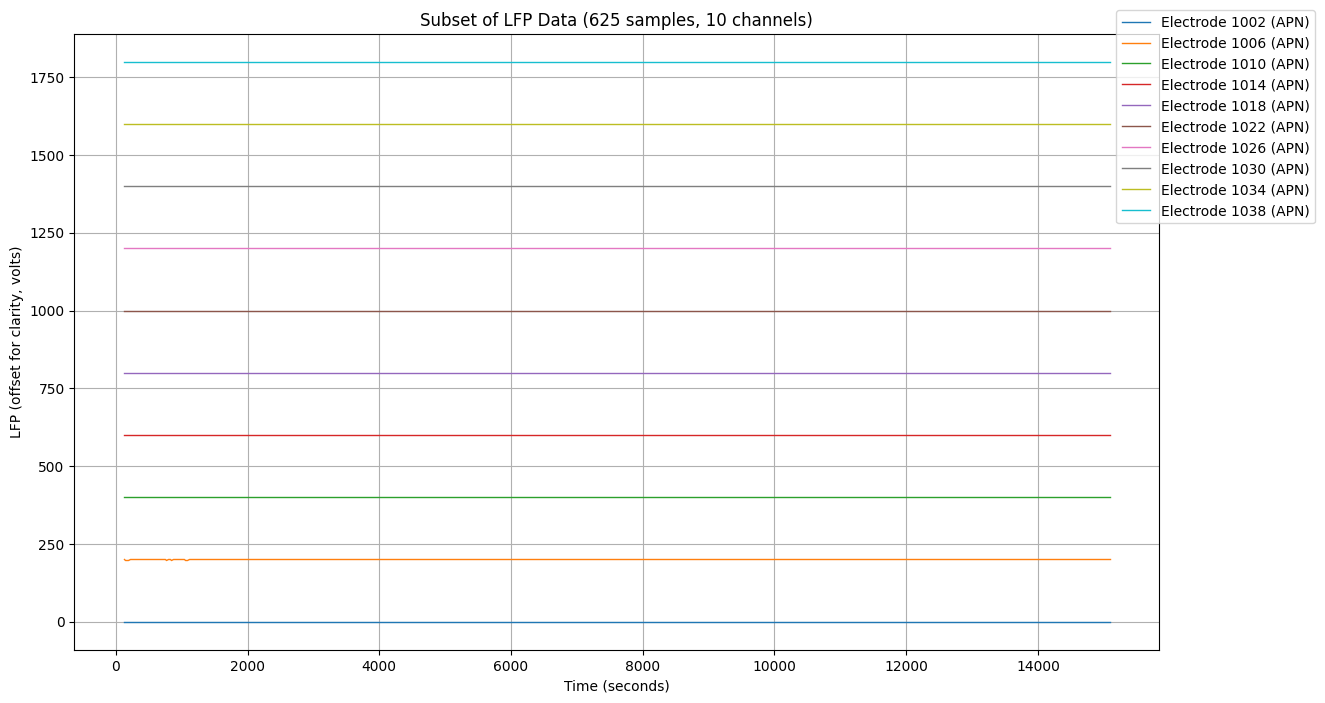

In [5]:
# Define the time interval and number of channels to visualize
start_time = 100 # seconds
duration = 1 # seconds
sampling_rate = nwb.electrode_groups['probeB'].lfp_sampling_rate
num_samples_to_plot = int(duration * sampling_rate)

# Find the indices corresponding to the time interval
start_index = np.searchsorted(lfp_timestamps, start_time)
end_index = start_index + num_samples_to_plot

# Ensure indices are within bounds
if end_index > lfp_data.shape[0]:
    end_index = lfp_data.shape[0]
    num_samples_to_plot = end_index - start_index

if start_index >= end_index:
    print("Warning: Specified time interval is out of bounds or too short.")
    start_index = 0
    end_index = min(num_samples_to_plot, lfp_data.shape[0])
    num_samples_to_plot = end_index - start_index
    print(f"Plotting from the beginning for {num_samples_to_plot} samples.")


num_channels_to_plot = 10
channel_indices_to_plot = np.arange(min(num_channels_to_plot, lfp_data.shape[1]))

# Load the subset of LFP data and timestamps
lfp_subset = lfp_data[start_index:end_index, channel_indices_to_plot]
timestamps_subset = lfp_timestamps[start_index:end_index]

# Get the electrode IDs and locations for the plotted channels
plotted_electrode_ids = electrodes_df.iloc[channel_indices_to_plot].index.tolist()
plotted_electrode_locations = electrodes_df.iloc[channel_indices_to_plot]['location'].tolist()


# Plot the LFP data subset
plt.figure(figsize=(14, 8))
offset = 200 # Adjusted offset for visualization
for i, channel_index in enumerate(channel_indices_to_plot):
    plt.plot(timestamps_subset, lfp_subset[:, i] + i * offset, lw=1, label=f'Electrode {plotted_electrode_ids[i]} ({plotted_electrode_locations[i]})') # Offset channels for visibility

plt.xlabel("Time (seconds)")
plt.ylabel("LFP (offset for clarity, volts)")
plt.title(f"Subset of LFP Data ({num_samples_to_plot} samples, {num_channels_to_plot} channels)")
# Adjust legend placement
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))
plt.grid(True)
plt.show()

This plot shows the LFP activity over a short time window for a few selected channels. We can observe the fluctuations in the local field potential, which reflect the summed synaptic activity of nearby neurons. Different channels may show different patterns depending on their location and the surrounding neural activity. Note the vertical offsets applied to the traces for clearer visualization; the Y-axis labels represent the offset values. The offset is applied to prevent overlapping of the traces.

### Note on Units Data and Stimulus Information

This specific NWB file (`sub-681446/sub-681446_ses-1290510496_probe-1_ecephys.nwb`) did not appear to contain processed spike units data. Units data, if available, would typically be found under `nwb.units` and would include information about individual neurons' spike times and potentially other characteristics. If you are interested in units data, you may need to explore other NWB files within this Dandiset, as some files are likely to contain the results of spike sorting.

Information about the visual stimuli presented during the recording might be available in other NWB files (e.g., `_ogen.nwb`) or within the `stimulus` or `processing` modules of this or other `_ecephys.nwb` files. Exploring these sections would be necessary to analyze neural responses to the stimuli.

## Analyzing LFP Frequency Content

We can analyze the frequency content of the LFP signal using methods like computing the power spectral density (PSD). This can reveal dominant oscillations in the LFP, such as theta, alpha, beta, or gamma rhythms.

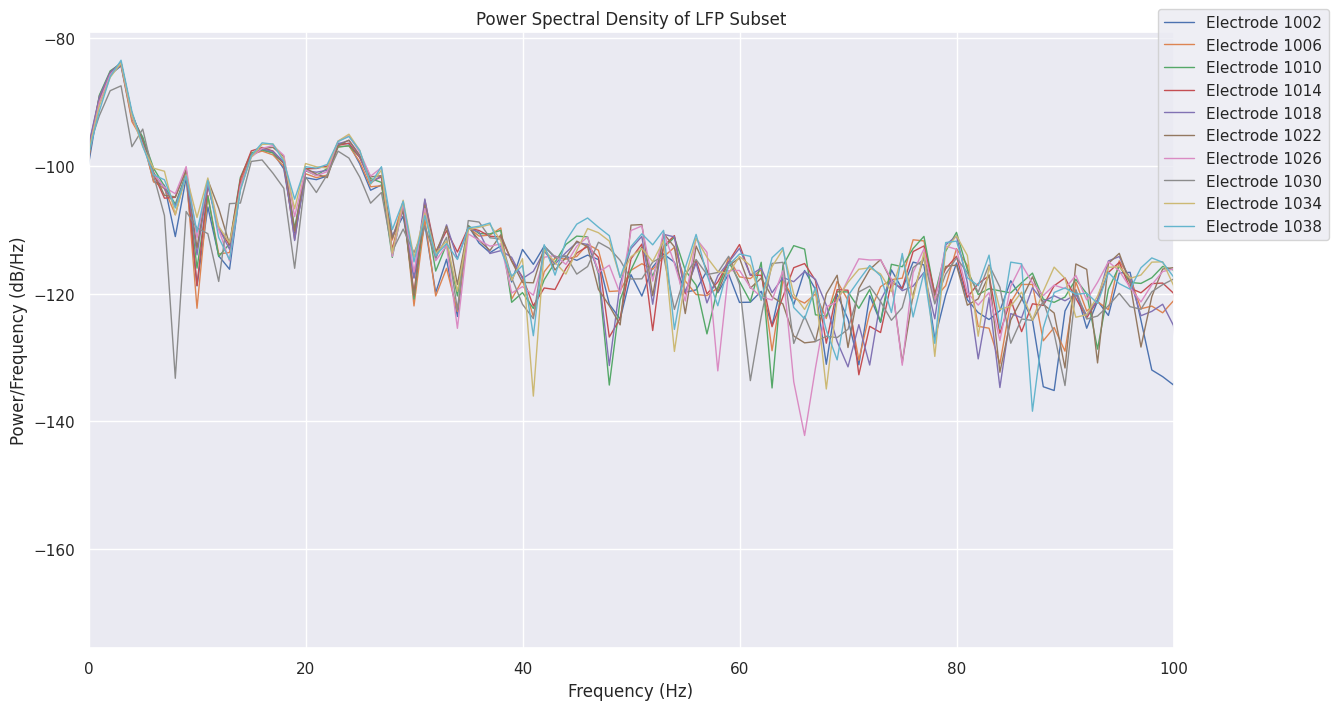

In [6]:
import scipy.signal as signal

# Select the same channels as in the previous plot
channel_indices_to_plot_psd = np.arange(min(num_channels_to_plot, lfp_data.shape[1]))

plt.figure(figsize=(14, 8))
sns.set_theme() # Use seaborn style for PSD plot
for i, channel_index in enumerate(channel_indices_to_plot_psd):
    # Compute Power Spectral Density using Welch's method
    # Using a small segment of data for faster computation
    segment_length = int(2 * sampling_rate) # 2 seconds segment
    if segment_length > lfp_subset.shape[0]:
        segment_length = lfp_subset.shape[0]

    # Ensure segment_length is at least 1 and not greater than the available data
    if segment_length < 1:
        segment_length = 1
    if segment_length > len(lfp_timestamps):
        segment_length = len(lfp_timestamps)


    frequencies, psd = signal.welch(lfp_subset[:segment_length, i], fs=sampling_rate, nperseg=segment_length)
    plt.plot(frequencies, 10 * np.log10(psd), lw=1, label=f'Electrode {plotted_electrode_ids[i]}')

plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.title("Power Spectral Density of LFP Subset")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))
plt.grid(True)
plt.xlim([0, 100]) # Limit frequency range for better visualization
plt.show()

This plot shows the power spectral density for the selected LFP channels. The PSD reveals how the power of the LFP signal is distributed across different frequencies. Peaks in the PSD can indicate prominent brain oscillations (e.g., delta, theta, alpha, beta, gamma bands). Note that we are plotting PSD for a short segment of the LFP data.

### Understanding Temporal Barcoding

The Dandiset is related to the concept of "temporal barcoding". Based on the Dandiset description, this refers to the observation that some visual neurons respond to repeated white noise visual stimuli with precise, reproducible spike timing patterns that look like barcodes when displayed on a raster plot. The dataset provides "barcodes" for visually responsive neurons, allowing researchers to test the hypothesis that these barcodes can serve as identifiers of discrete cell types. While this notebook focused on LFP, analyzing the precise spike timings of individual units (if found in other files) would be crucial for exploring the temporal barcoding aspect of the dataset.

## Future Directions

This notebook has provided a basic introduction to accessing and visualizing LFP data from a single NWB file in Dandiset 000563. Here are some possible future directions for analysis:

*   **Explore other NWB files:** Investigate other `_ecephys.nwb` files in the Dandiset, particularly those that may contain units data.
*   **Analyze LFP spectral properties:** Compute power spectral density or spectrograms to understand the frequency content of the LFP signal.
*   **Relate LFP to stimuli:** If stimulus timing information is available (likely in the `_ogen.nwb` files or within the `_ecephys.nwb` file's `stimulus` or `processing` modules), you could analyze LFP responses aligned to stimulus presentations.
*   **Analyze units data:** If you find files with units data, you could perform analyses like computing firing rates, inter-spike intervals, or cross-correlations between units.
*   **Combine data across probes/sessions:** Analyze data from multiple probes within a session or across different sessions and subjects to study neural activity in different brain regions or under different conditions.
*   **Investigate temporal barcodes:** Explore how to extract and analyze the "temporal barcodes" mentioned in the Dandiset description, which may involve looking at precise spike timings or patterns across repeated stimulus presentations.

This concludes the introductory exploration of Dandiset 000563. Remember to consult the Dandiset metadata and any associated documentation for more detailed information about the experimental design and data structure.